<a href="https://colab.research.google.com/github/kanarhy15/TugasMachineLearning/blob/main/TM9_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn import preprocessing, svm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
def centroidRandom(batas_x, batas_y, batas_z):
	if(batas_x>1): x = np.random.randint(0,batas_x)
	else : x = np.random.random()
	if(batas_y>1): y = np.random.randint(0,batas_y)
	else : y = np.random.random()
	if(batas_z>1): z = np.random.randint(0,batas_z)
	else : z = np.random.random()
	centroid=[]
	for x in range(3):
		centroid.append([x,y,z])
	return centroid

def jarakKmeans(centroid, data_x, data_y, data_z):
	data=[]
	for x in range(len(data_x)):
		t=[];i=0
		for j in range(len(centroid)):
			t.append(np.sqrt((data_x[x]-centroid[j][0])**2+(data_y[x]-centroid[j][1])**2+(data_z[x]-centroid[j][2])**2))
		while (min(t)!=t[i]): i+=1
		data.append(i+1)
	return data

def jarakManhhattan(centroid, data_x, data_y, data_z):
	data=[]
	for x in range(len(data_x)):
		t=[];i=0
		for j in range(len(centroid)):
			t.append( abs(data_x[x]-centroid[j][0]) + abs(data_y[x]-centroid[j][1]) + abs(data_z[x]-centroid[j][2]) )
		while (min(t)!=t[i]): i+=1
		data.append(i+1)
	return data

def titikBaru(centroid, data_x, data_y, data_z):
	hasil=[]
	for i in range(3):
		x=[];y=[];z=[]
		for j in range(len(centroid)):
			if(centroid[j]==i+1):
				x.append(data_x[j])
				y.append(data_y[j])
				z.append(data_z[j])
		x1=0;y1=0;z1=0
		if(x!=[]):
			x1=np.array(x).mean()
			y1=np.array(y).mean()
			z1=np.array(z).mean()
		hasil.append([x1,y1,z1])
	return hasil

def plot(centroid, data, data_x, data_y, data_z, labelX, labelY, labelZ, title):
	x=[];y=[];z=[];x1=[];y1=[];z1=[];x2=[];y2=[];z2=[];x3=[];y3=[];z3=[]
	for i in range(len(data_x)):
		if(data[i]==1):
			x1.append(data_x[i])
			y1.append(data_y[i])
			z1.append(data_z[i])
		elif(data[i]==2):
			x2.append(data_x[i])
			y2.append(data_y[i])
			z2.append(data_z[i])
		elif(data[i]==3):
			x3.append(data_x[i])
			y3.append(data_y[i])
			z3.append(data_z[i])

	for j in range(len(centroid)):
		x.append(centroid[j][0])
		y.append(centroid[j][1])
		z.append(centroid[j][1])
	pt = plt.figure().add_subplot(111, projection='3d')
	pt.scatter(x1,y1,z1, color='orange');pt.scatter(x2,y2,z2, color='blue')
	pt.scatter(x3,y3,z3, color='green')
	pt.scatter(x,y,z, color='black')
	plt.title(title)
	pt.set_xlabel(labelX)
	pt.set_ylabel(labelY)
	pt.set_zlabel(labelZ)
	plt.show()
 # Classification
def takesecond(elem):
    return elem[0]

def predictKNN(latih, test, neighbours):
	data=[]
	for x in range(len(test)):
		t=[];sortNeighbours=[];i=0
		for j in range(len(latih)):
			t.append([np.sqrt((latih[j][0]-test[x][0])**2+(latih[j][1]-test[x][1])**2+(latih[j][2]-test[x][2])**2), latih[j][3]])
		sortedList = sorted(t, key=takesecond)
		for k in range(neighbours):
			sortNeighbours.append(sortedList[k][1])
		data.append(stats.mode(sortNeighbours)[0][0])
	return data

def prdictNaiveBayes(data, test):
  satu = data[data.group == 1];dua = data[data.group == 2];tiga = data[data.group == 3]
  test = test.to_numpy()
  var=[];mean=[]
  var.append(satu.var().to_numpy()); mean.append(satu.mean().to_numpy())
  var.append(dua.var().to_numpy()); mean.append(dua.mean().to_numpy())
  var.append(tiga.var().to_numpy()); mean.append(tiga.mean().to_numpy())
  predict=[]
  for i  in range (len(test)):
    hasil=[]; l=0
    for j in range (len(var)):
      temp=[]
      for k in range (len(var[0])-1):
        temp.append((1/np.sqrt(var[j][k])*np.sqrt(2*np.pi))*np.exp(-(test[i][k]-mean[j][k])**2/2*var[j][k]))
      hasil.append(np.prod(temp)*(len(data[data.group == j+1])/len(data)))
    while (max(hasil)!= hasil[l]): l+=1
    predict.append(l+1)
  return predict

In [11]:
url = 'https://raw.githubusercontent.com/nyomanyoga/machine_learning/master/data_set/used_cars.csv'
data = pd.read_csv(url)

# Kolom yang digunakan
data= data[['price','year','manufacturer','condition','odometer','type']]

# Menghapus data kosong
data.dropna(inplace=True)

# Mengisi data kosong dengan nilai rata2
# data.fillna(data.mean())

# Mencari outlier dengan boxplot
# sns.boxplot(data[['price']])
# sns.boxplot(data[['year']])
# sns.boxplot(data[['odometer']])

# Menghapus outlier
data=data[(data.year>1997) & (data.price<30000) & (data.odometer<250000)]

# Membagi data antara angka dengan tulisan
data1=data.drop(columns=['manufacturer','condition','type'])
data2=data.drop(columns=['price','year','odometer'])

# Normalisasi skala data
minmax=preprocessing.MinMaxScaler().fit_transform(data1)
data1=pd.DataFrame(minmax, index=data.index, columns=['price','year','odometer'])

for i in range(3):
  data2.to_numpy()[:,i]=LabelEncoder().fit_transform(data2.to_numpy()[:,i])


Akurasi Kemiripan : 100.0 %

Titik Centroid : [[0.3399228706510378, 0.5980386959978788, 27.64081632653061], [0.3430022013284297, 0.5819278572947998, 11.896936821952776], [0.3508675173801498, 0.5797707794512899, 4.317891373801917]]




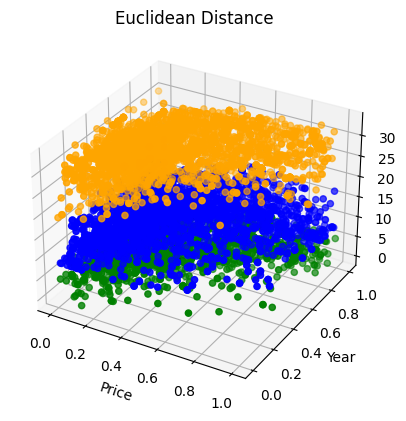

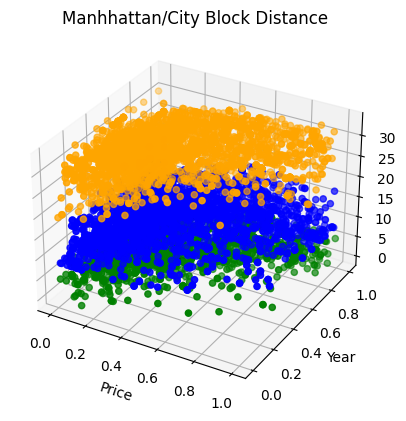

In [8]:
data_x = data1['price'].to_numpy(); data_y = data1['year'].to_numpy(); data_z = data2['manufacturer'].to_numpy()

titik_centroid = centroidRandom(data_x.max(), data_y.max(), data_z.max())
titik_centroid2 = titik_centroid
i = 0
while(i < 10 or b2 != titik_centroid2 or b != titik_centroid):
  b = titik_centroid
  b2 = titik_centroid2
  hasil_pengelompokan = jarakKmeans(titik_centroid, data_x, data_y, data_z)
  hasil_pengelompokan2 = jarakManhhattan(titik_centroid2, data_x, data_y, data_z)
  titik_centroid = titikBaru(hasil_pengelompokan, data_x, data_y, data_z)
  titik_centroid2 = titikBaru(hasil_pengelompokan2, data_x, data_y, data_z)
  i+=1

print("Akurasi Kemiripan :", r2_score(titik_centroid, titik_centroid2)*100, "%\n")
print("Titik Centroid :",titik_centroid)
print("\n")
plot(titik_centroid, hasil_pengelompokan, data_x, data_y, data_z, "Price", "Year", "Manufacturer", "Euclidean Distance")
print("\n")
plot(titik_centroid2, hasil_pengelompokan2, data_x, data_y, data_z, "Price", "Year", "Manufacturer", "Manhhattan/City Block Distance")


In [12]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming data1, data2, and hasil_pengelompokan are already defined and loaded
x = data1[['price', 'year']]
x['manufacturer'] = data2['manufacturer']
y = hasil_pengelompokan
data_baru = x.copy()
data_baru['group'] = hasil_pengelompokan

# Membagi data train dengan data test (80 : 20)
data_train, data_test, predict_train, predict_test = train_test_split(data_baru, y, test_size=0.2, random_state=42)

# Define a dummy predictKNN function (you need to implement your own KNN function here)
def predictKNN(train_data, test_data, k):
    # This is a placeholder function
    # Implement the KNN algorithm manually here
    return np.random.choice(np.unique(predict_train), len(test_data))

# KNN Classification tanpa Library (Manual KNN)
predict = predictKNN(data_train[['price', 'year', 'manufacturer']].to_numpy(), data_test[['price', 'year', 'manufacturer']].to_numpy(), 3)
print('KNN Classification Tanpa Library\t:', accuracy_score(predict_test, predict) * 100, '%')

# KNN Classification Library
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(data_train[['price', 'year', 'manufacturer']], predict_train)
predict_KNN = KNN.predict(data_test[['price', 'year', 'manufacturer']])

print('KNN Classification Library\t:', accuracy_score(predict_test, predict_KNN) * 100, '%')

KNN Classification Tanpa Library	: 36.18677042801556 %
KNN Classification Library	: 100.0 %


In [13]:
# Naive Bayes Tanpa Library
y_predict = prdictNaiveBayes(data_train, data_test)

# Naive Bayes Library
NB = GaussianNB()
NB.fit(data_train, predict_train)
y_predict2 = NB.predict(data_test)

print('Naive Bayes Tanpa Library\t:',r2_score(predict_test, y_predict)*100, '%')
print('Naive Bayes\t\t\t:',r2_score(predict_test, y_predict2)*100, '%')


Naive Bayes Tanpa Library	: 95.368551431577 %
Naive Bayes			: 100.0 %


In [14]:
data['group'] = hasil_pengelompokan
data.to_csv('hasil.csv')
data

,price,year,manufacturer,condition,odometer,type,group
0,17899,2012.0,volkswagen,excellent,63500.0,hatchback,1
24,4600,2008.0,honda,good,110982.0,sedan,2
48,28000,2004.0,ford,good,67348.0,truck,2
52,18999,2015.0,mercedes-benz,excellent,37000.0,sedan,1
54,18999,2013.0,bmw,excellent,65000.0,coupe,3
...,...,...,...,...,...,...,...
19927,11995,2017.0,subaru,like new,35050.0,wagon,1
19944,18995,2019.0,jeep,excellent,4100.0,SUV,2
19952,12000,2004.0,chevrolet,excellent,196700.0,pickup,3
19961,11500,2017.0,honda,like new,27415.0,sedan,2
